**Problem Statement**:

Hospitals often struggle to efficiently manage bed availability, staff allocation, and treatment planning due to uncertainty in patient length of stay. An inaccurate estimation of patient stay duration can lead to overcrowding, increased operational costs, and compromised quality of care. The objective of this project is to develop a machine learning model that predicts the length of hospital stay for a patient at the time of admission using demographic, clinical, and administrative data. Accurate predictions will help hospitals optimize resource utilization and improve patient outcomes.



In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [186]:
df = pd.read_csv('/content/HealthCareAnalytics.csv') # Loading dataset

In [187]:
df.head(2) #first 2 rows of the dataset

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [189]:
df.shape

(318438, 18)

**Descriptive Statistics**

In [190]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


**Insight:**

Available_Extra_Rooms_in_Hospital,City_Code_Patient,Visitors_with_Patient	and admission deposit this columns might have outliers

In [191]:
df.isnull().sum() # checking for null values

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available_Extra_Rooms_in_Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed_Grade,113


In [192]:
df['Bed_Grade'].nunique() #checking unique values in this column

4

In [94]:
df['Bed_Grade'].value_counts(ascending=True)

,count
Bed_Grade,
1.0,26505
4.0,57566
3.0,110583
2.0,123671


In [95]:
df['City_Code_Patient'].nunique() #37 unique values

37

Check for Outliers in null value columns and do impute method accorindly

<Axes: ylabel='City_Code_Patient'>

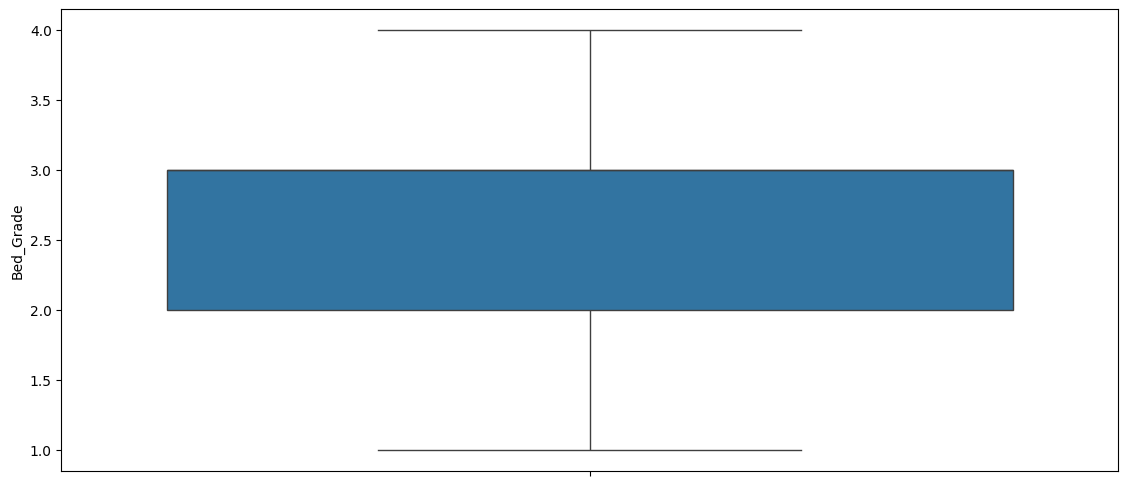

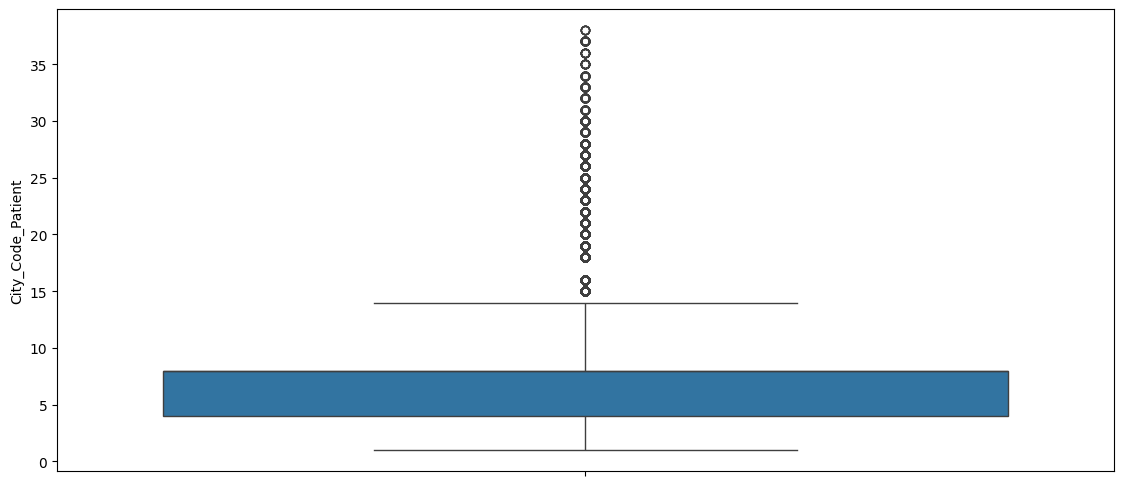

In [133]:
plt.figure(figsize =(30,6))
plt.subplot(1,2,1)
sns.boxplot(df['Bed_Grade'])

plt.figure(figsize =(30,6))
plt.subplot(1,2,2)
sns.boxplot(df['City_Code_Patient'])

**Observation -**

Bed_grade has null values and no outliers so we can fill with mean

City_code_patient has null values and has outliers so we can use median

In [193]:
df['Bed_Grade']= df['Bed_Grade'].fillna(df['Bed_Grade'].mean())
df['City_Code_Patient']= df['City_Code_Patient'].fillna(df['City_Code_Patient'].median())

In [194]:
df.isnull().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available_Extra_Rooms_in_Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed_Grade,0


In [195]:
df.duplicated().sum() # check duplivcates row if have drop that rows

np.int64(0)

In [196]:
df.drop(['case_id', 'patientid'], axis=1, inplace=True)  # drop 2 columns from dataset not so use

In [197]:
num_col = df.select_dtypes(include = ['int64','float64']).columns  # split numerical and categorical column in one variable
cat_col= df.select_dtypes(include='object').columns

In [102]:
print(num_col)

Index(['Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'City_Code_Patient',
       'Visitors_with_Patient', 'Admission_Deposit'],
      dtype='object')


In [103]:
cat_col

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age',
       'Stay'],
      dtype='object')

**Exploratory Data Analysis(EDA)**

**Univariate Analysis**

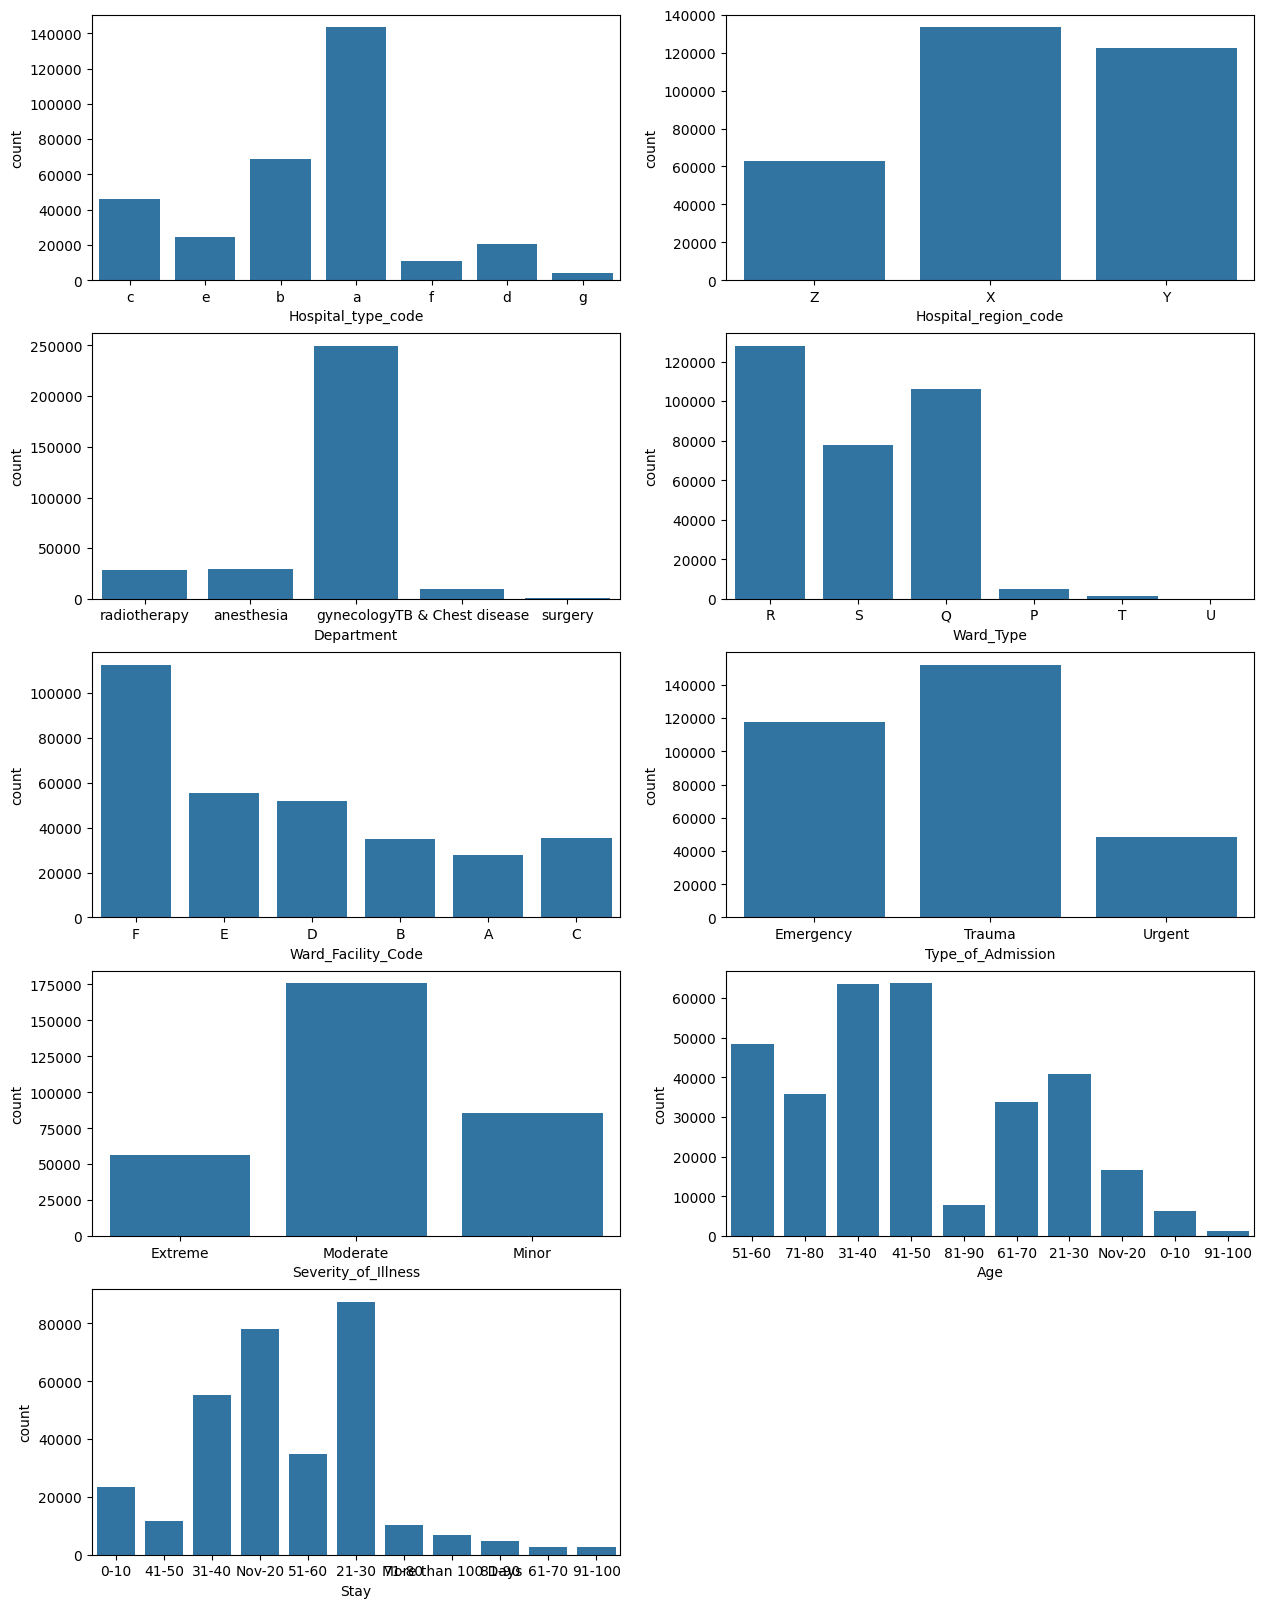

In [104]:
i=1
plt.figure(figsize=(15,20))
for col in cat_col:
    plt.subplot(5,2,i)
    sns.countplot(x=df[col])
    i=i+1
plt.show()   #frequency values in Categorical colunns

Observation:

Hospital_type_code = a,b,c,d code has more stay and e,f,g has less stay

hospital region code= x and y has more stay and z has less

ward_type = R,Q,S has high stay

ward facility code = F,E,D,c has high stay

type of asmission= Trauma has more patient then emergency

severity of illnes = moderate has more patient then minor at last extreme

age = 31 to 60  , 60-80 has more patient age so 30 - 80 age group people stays in hospital due to illness more

80-100 less no of people

stay = high no of days staying 21-30,11-20,31-40,51,60,0-10,41-50

least no of days 60-70,90-100



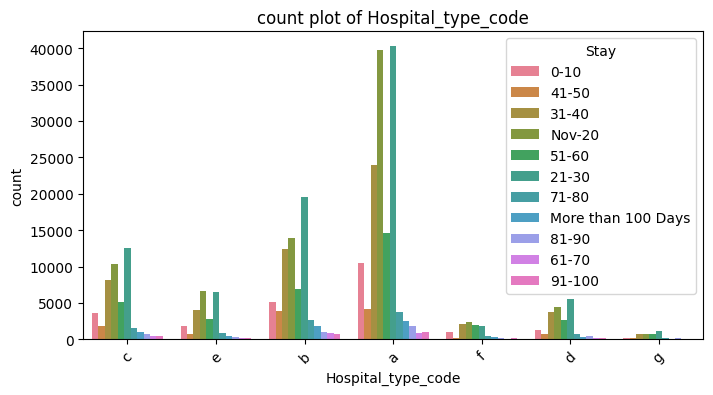

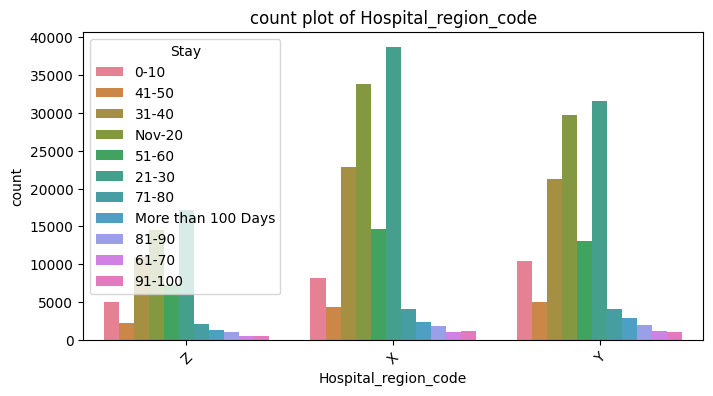

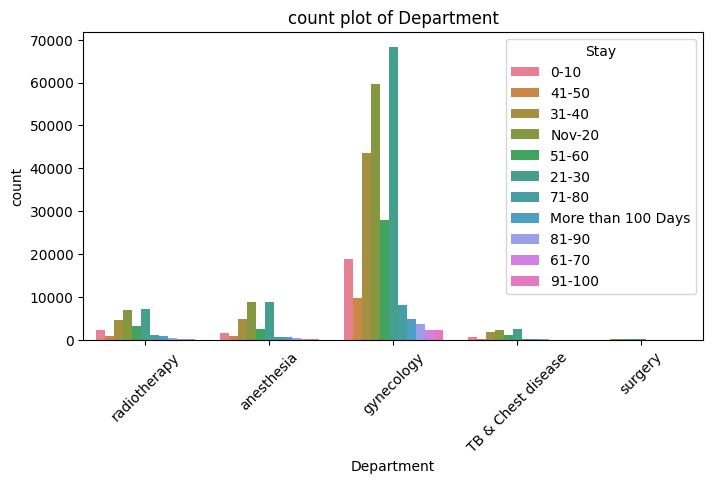

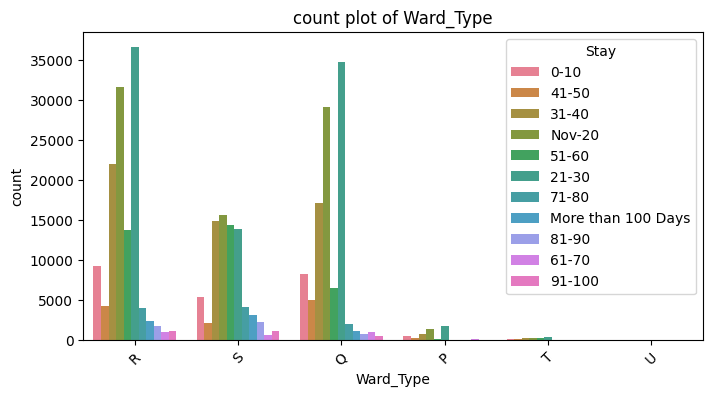

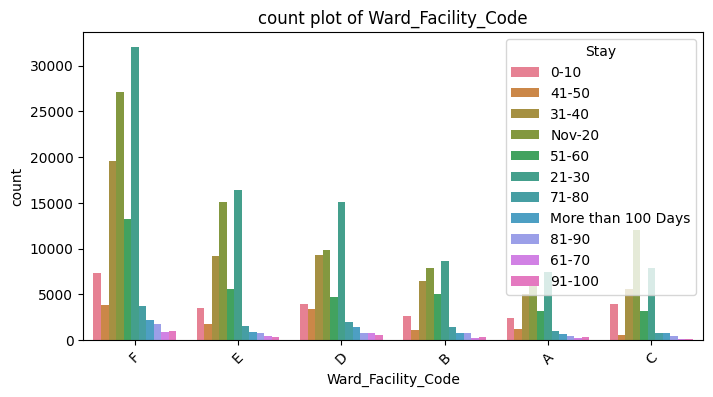

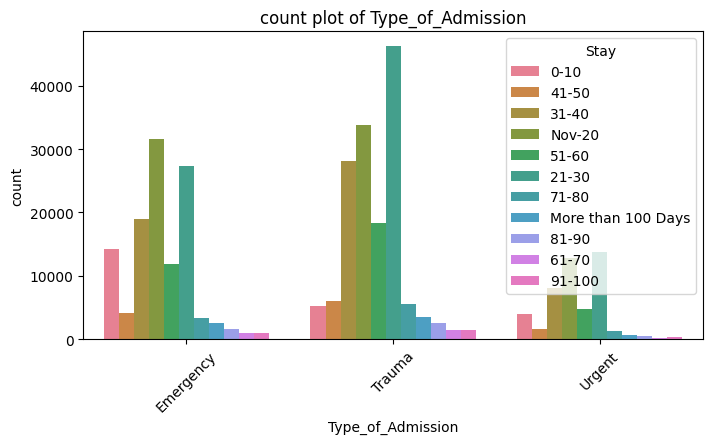

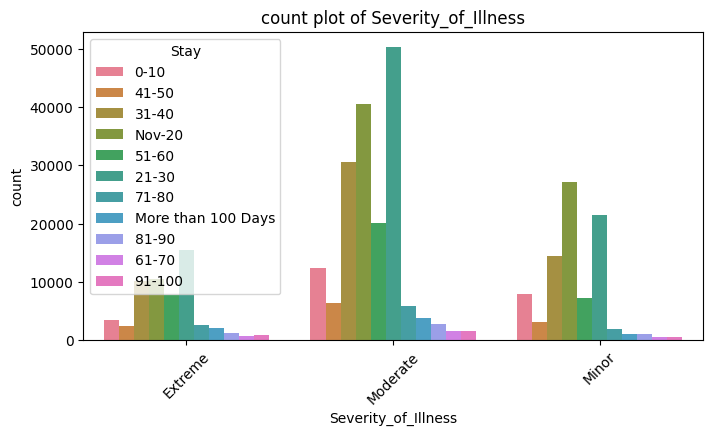

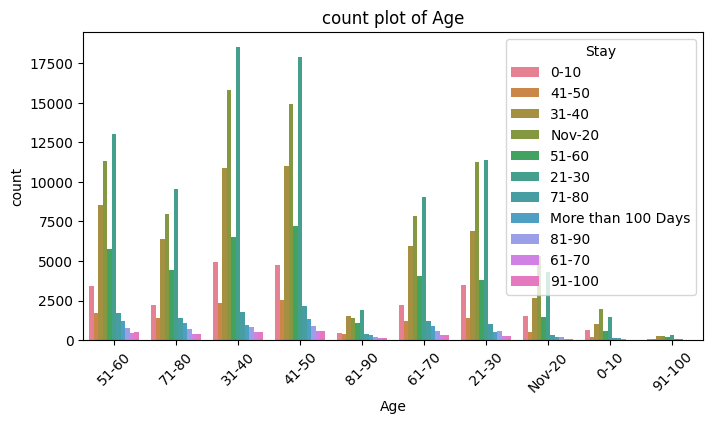

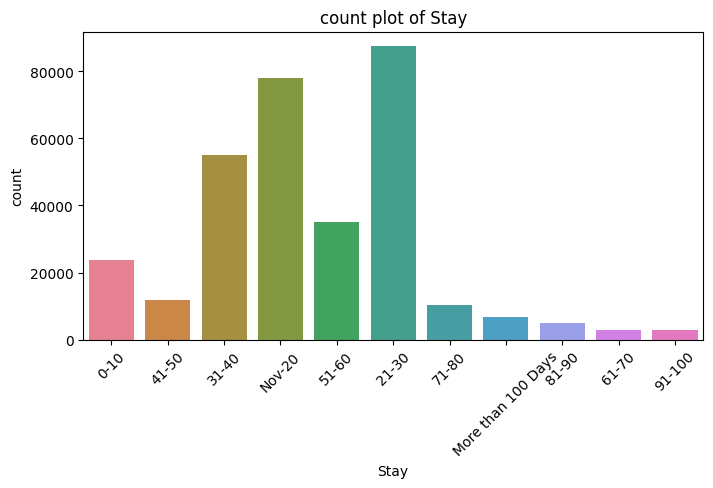

In [105]:
for col in cat_col:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=col, hue='Stay')
  plt.title(f"count plot of {col}")
  plt.xticks(rotation=45)
  plt.show()

/tmp/ipython-input-3444050168.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipython-input-3444050168.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipython-input-3444050168.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

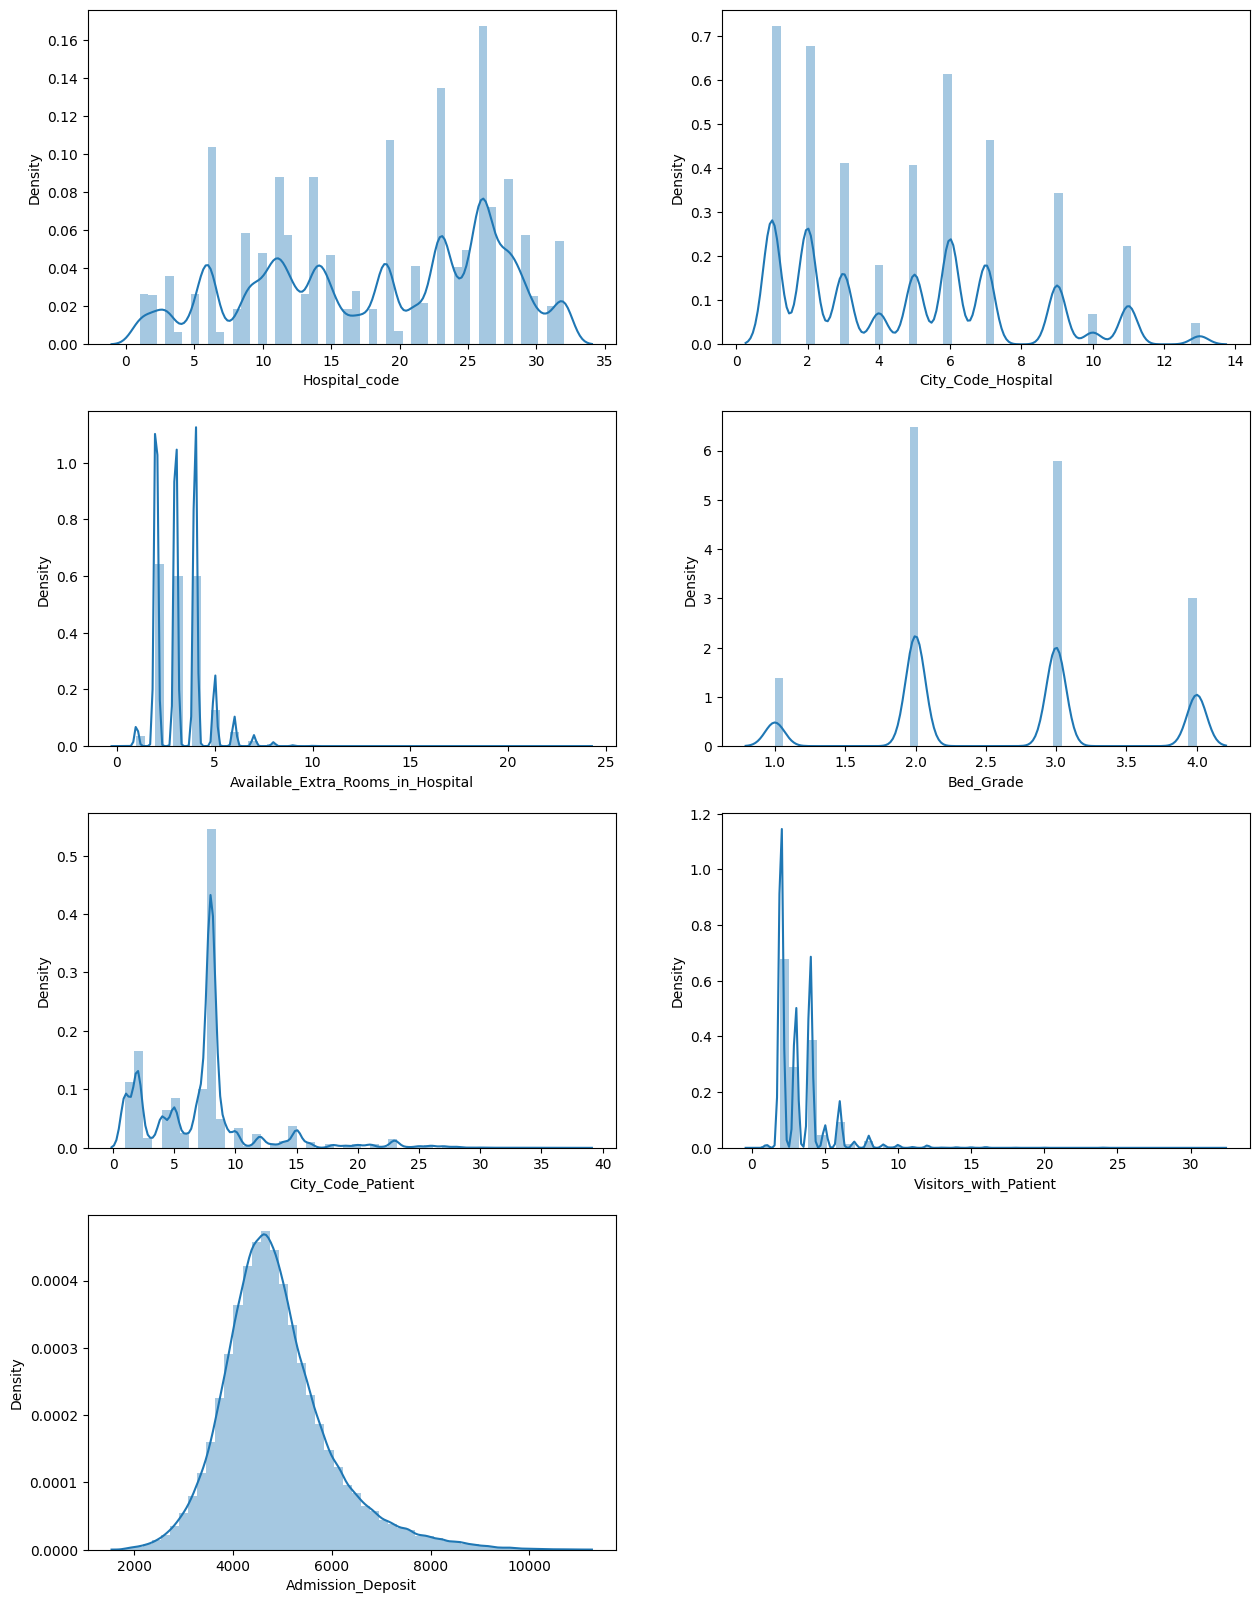

In [106]:
i=1   # checking numerical columns distribution normal,+ve or -ve skewed
plt.figure(figsize=(15,20))
for col in num_col:
    plt.subplot(4,2,i)
    sns.distplot(df[col])
    i=i+1

plt.show()

**Bivariate Analysis**

Comparing categorical vs categorical

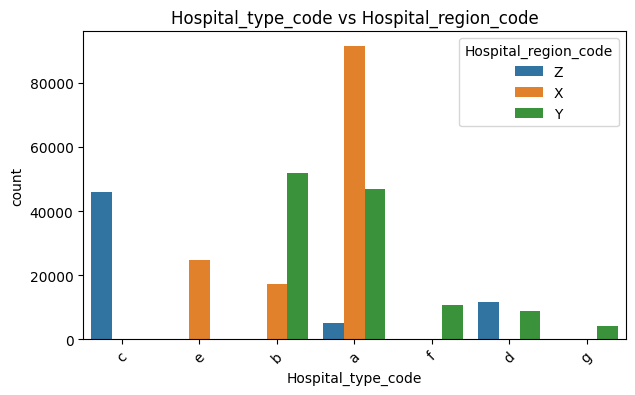

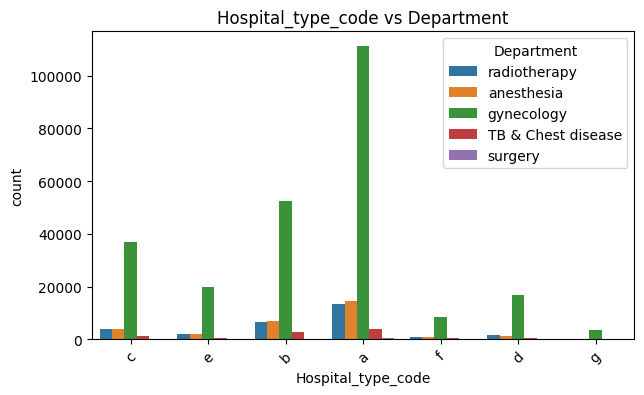

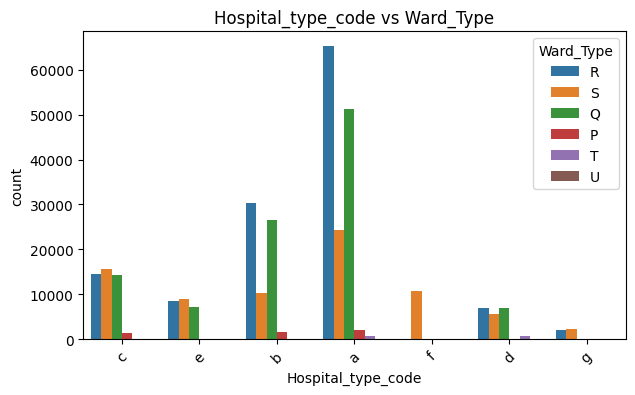

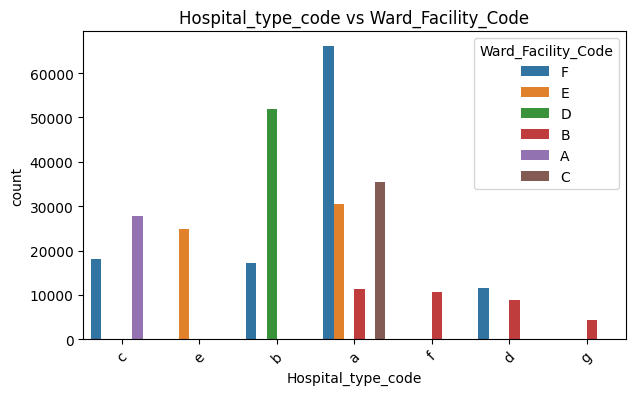

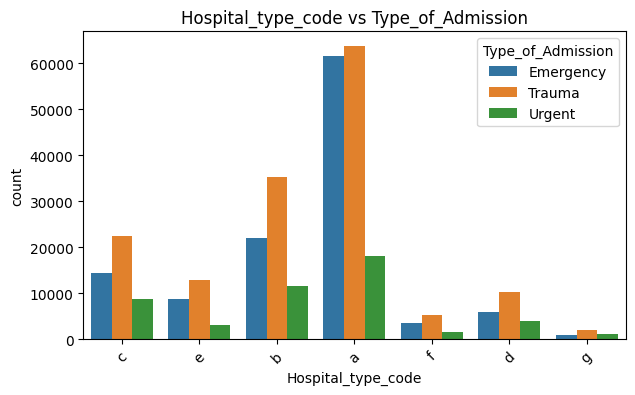

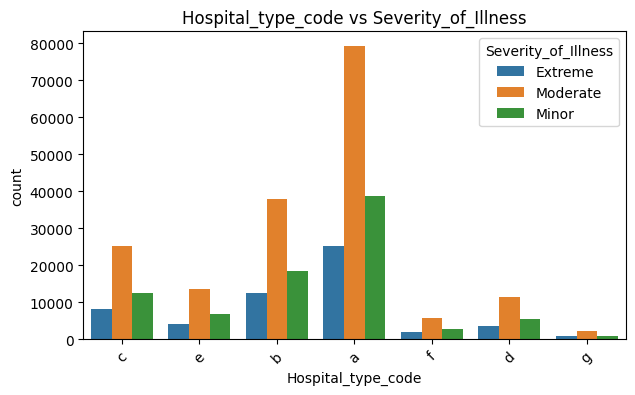

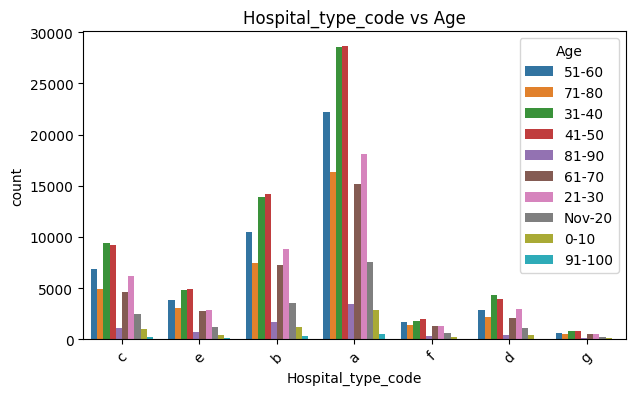

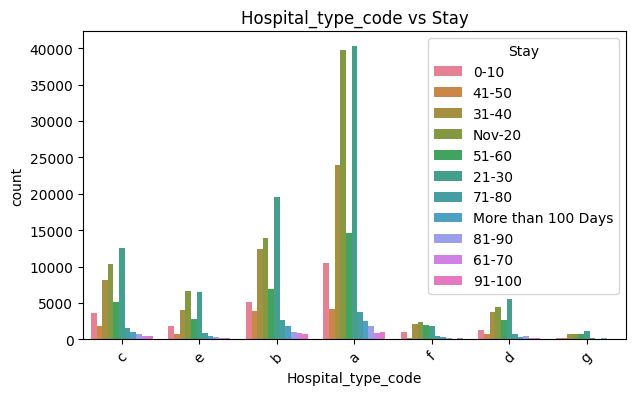

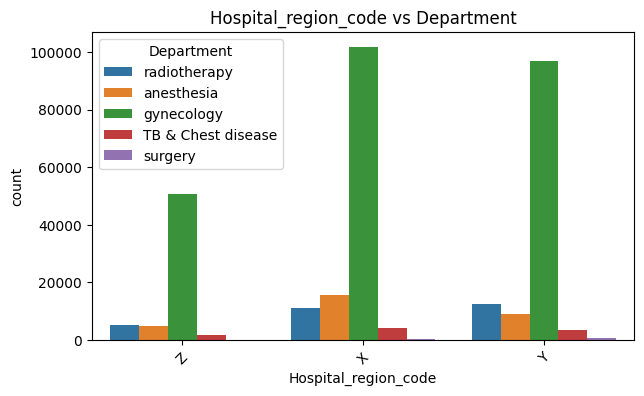

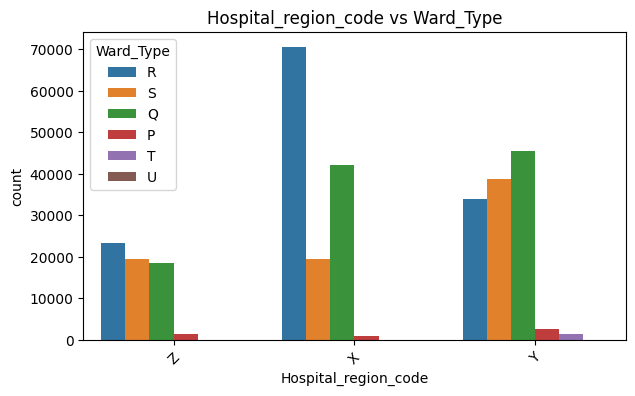

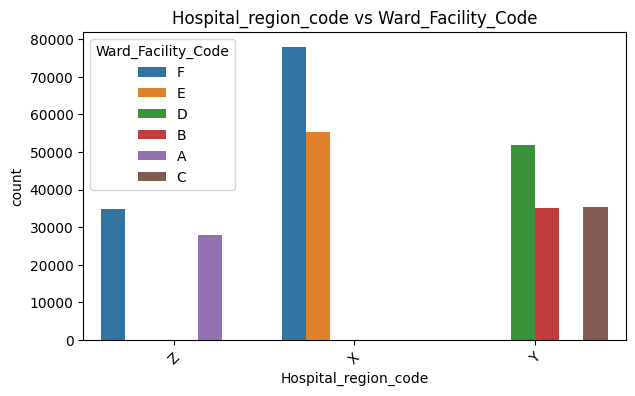

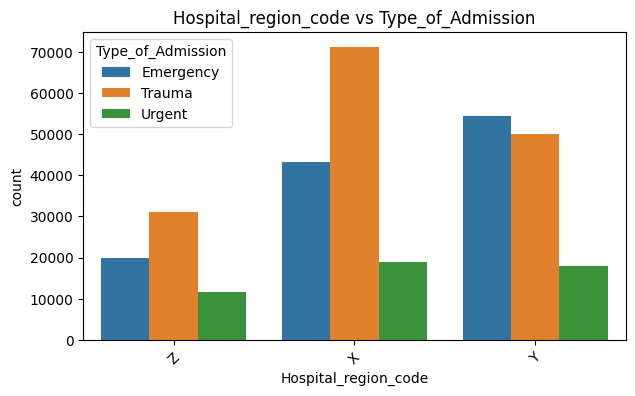

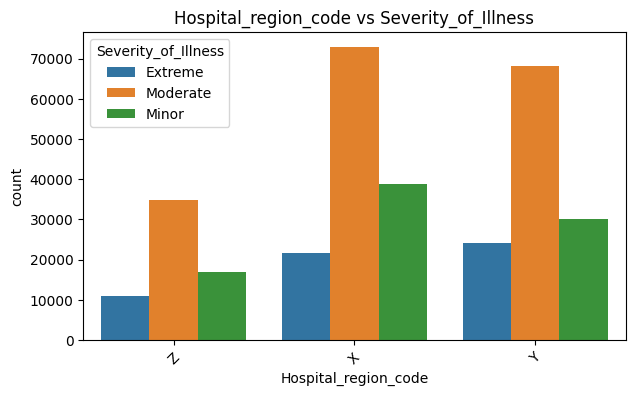

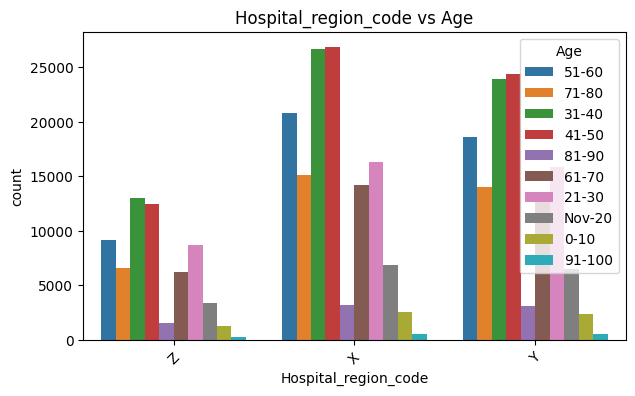

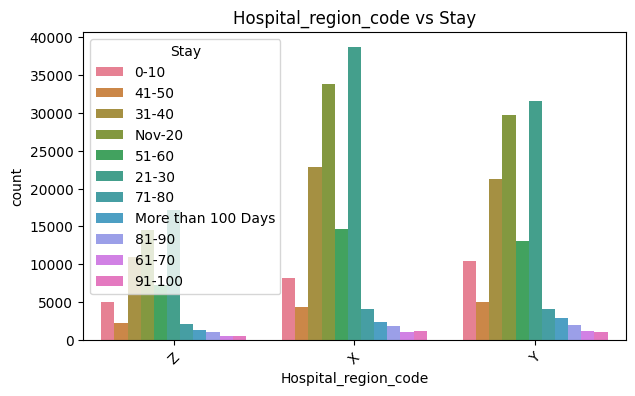

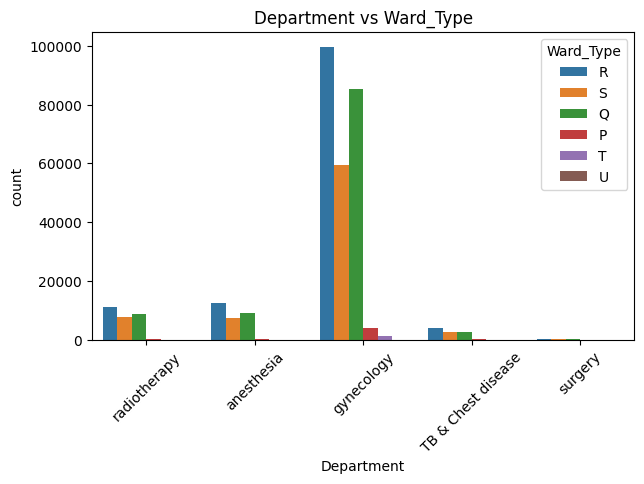

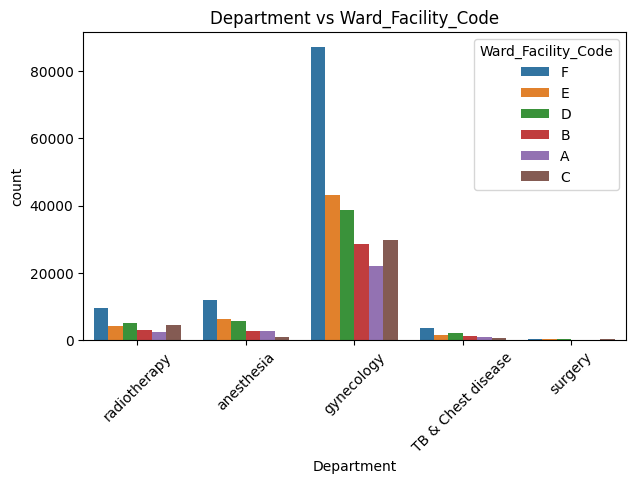

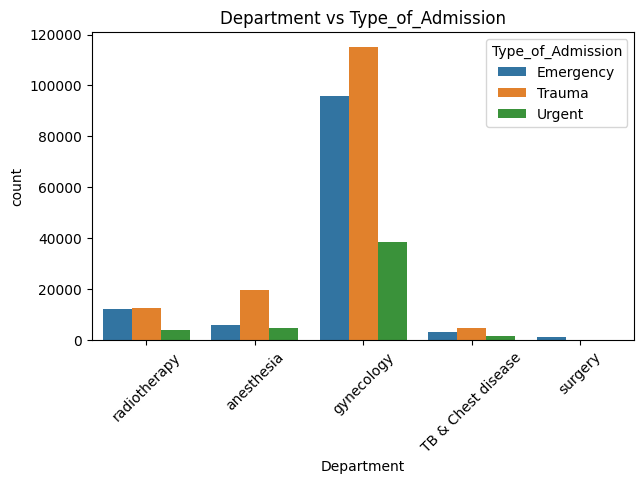

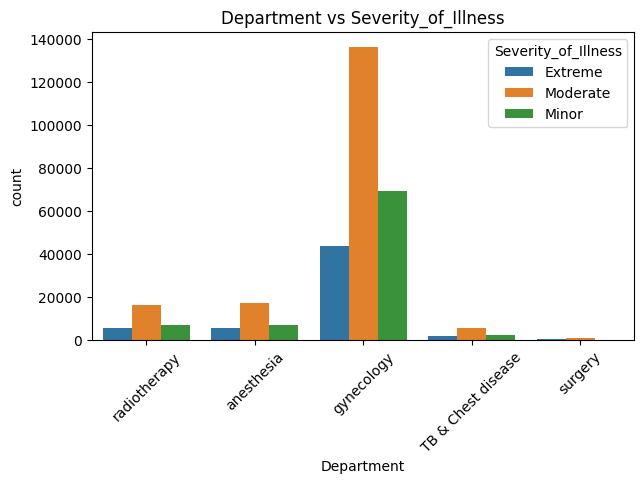

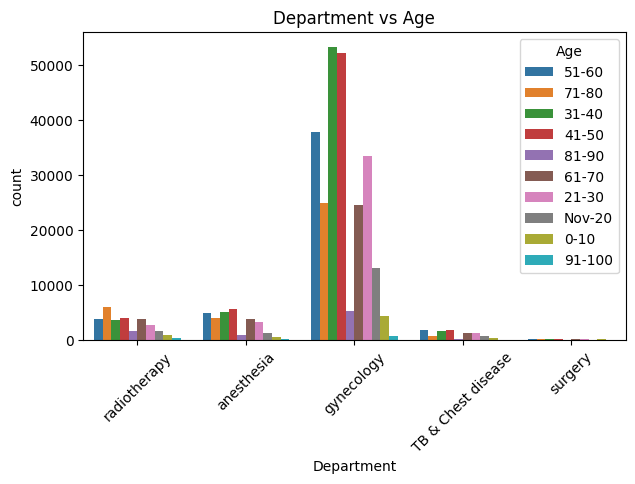

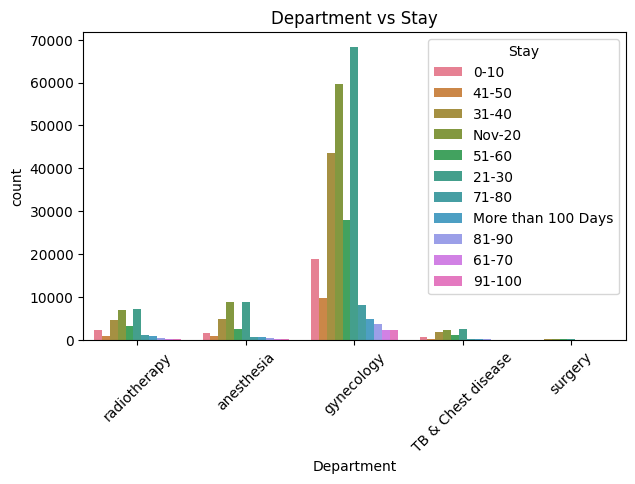

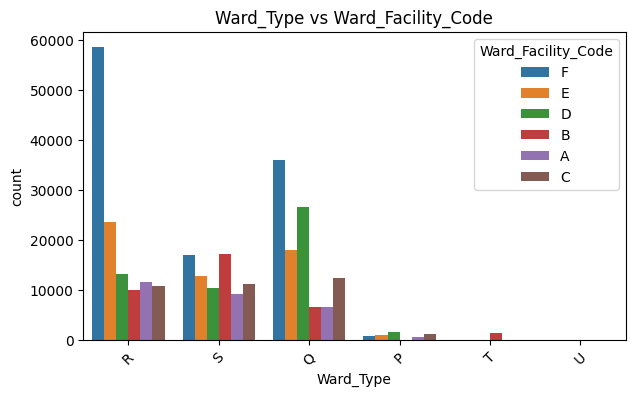

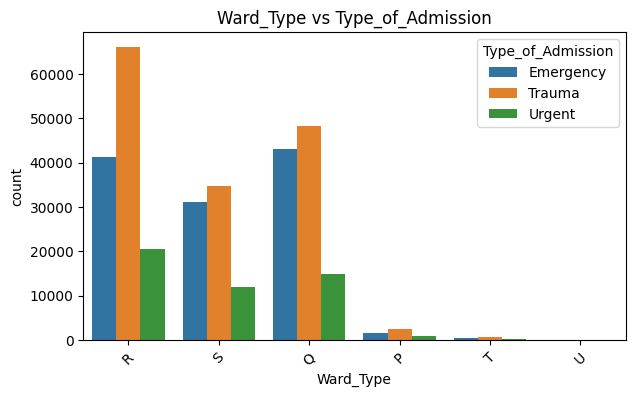

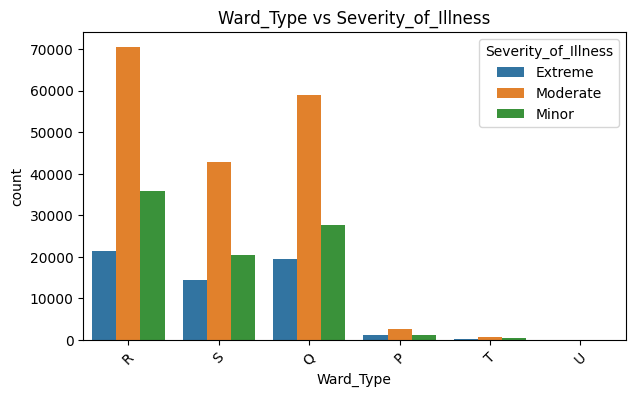

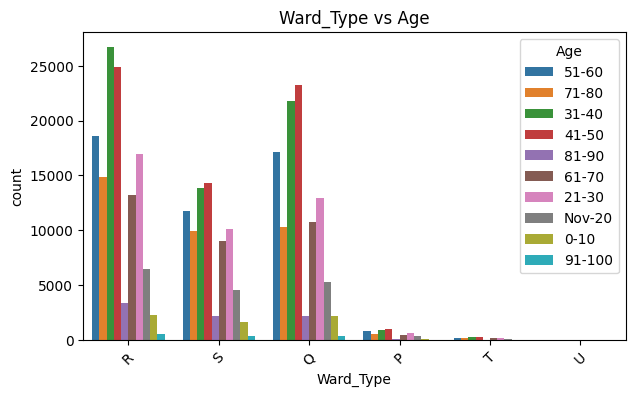

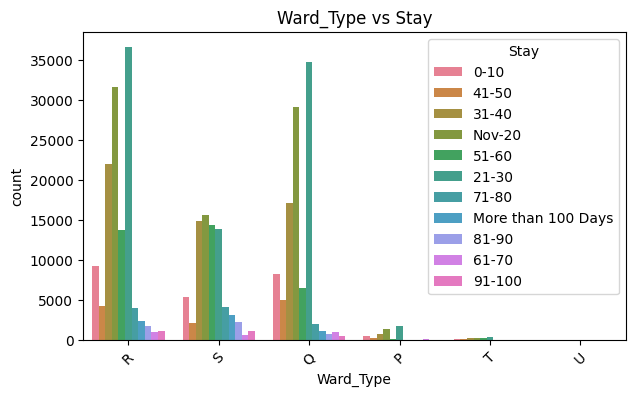

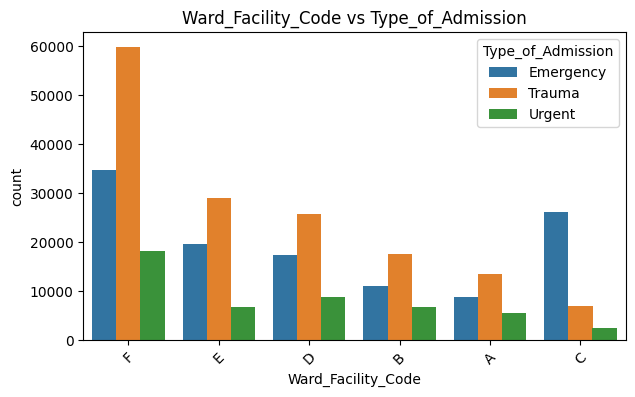

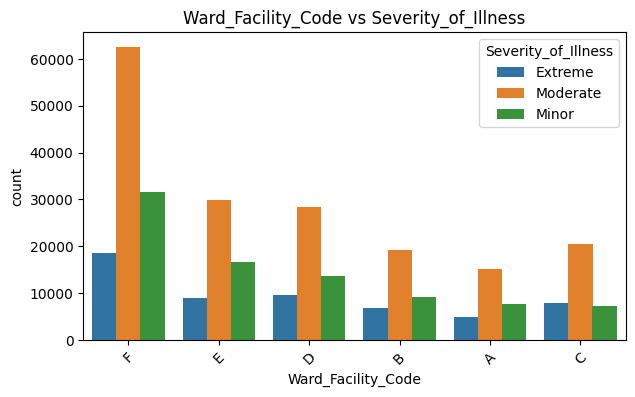

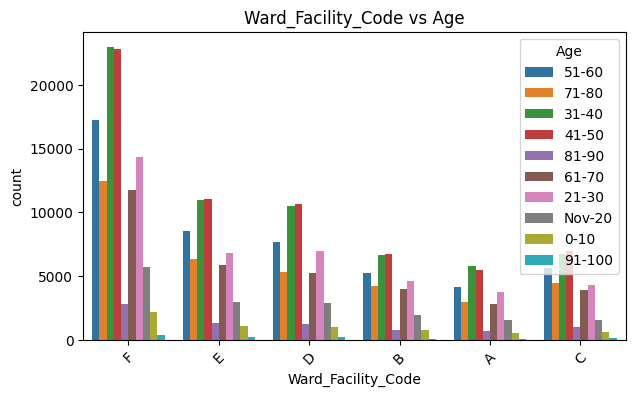

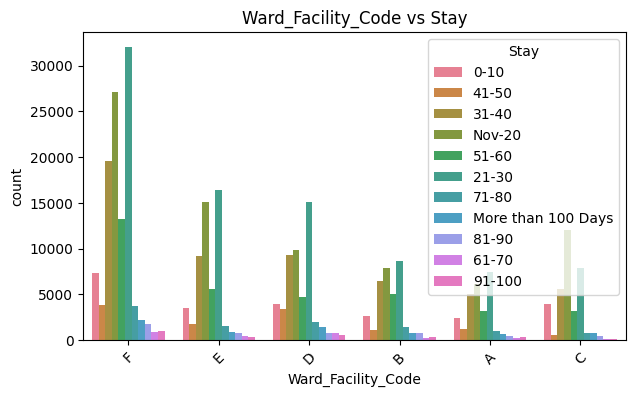

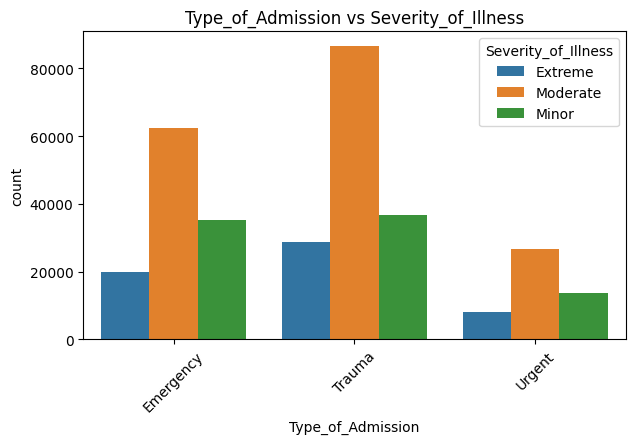

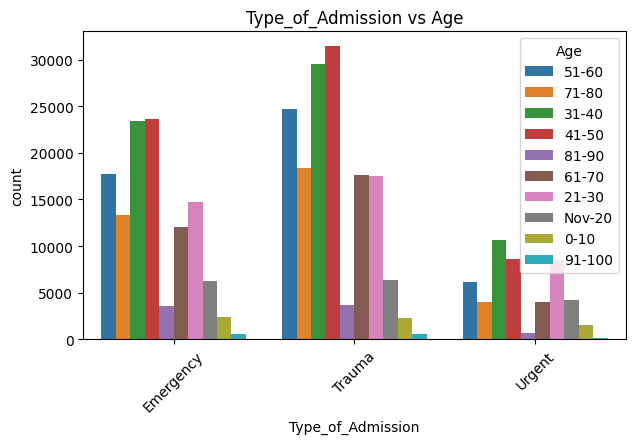

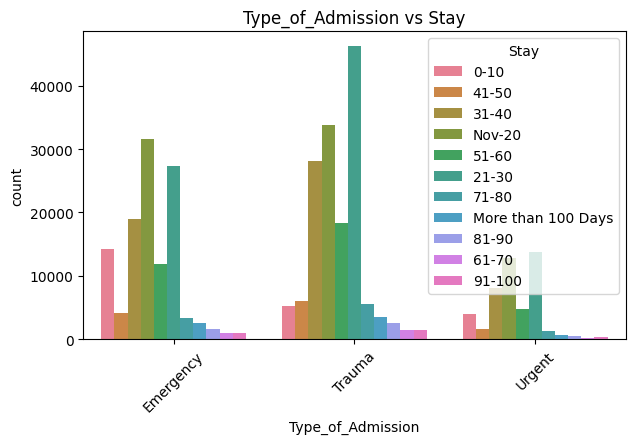

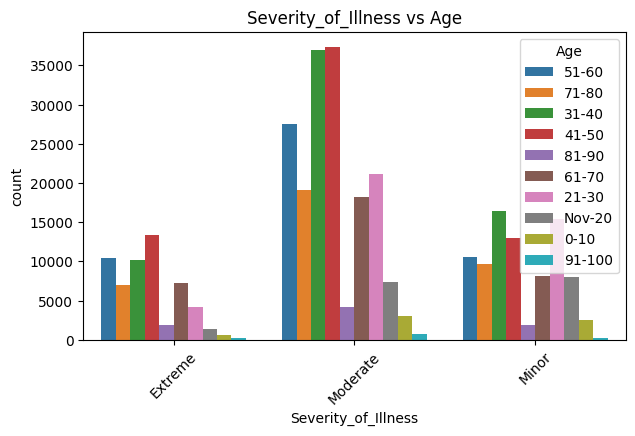

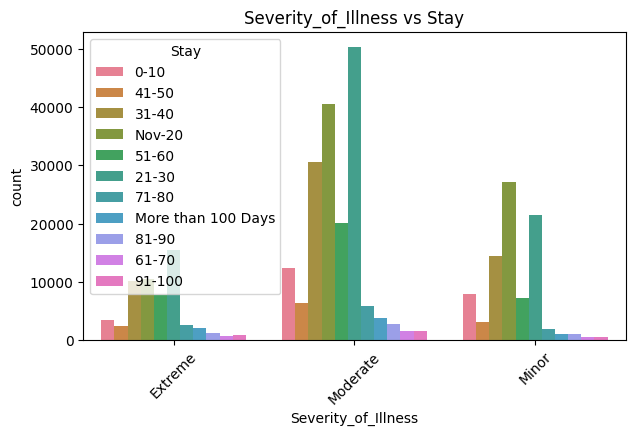

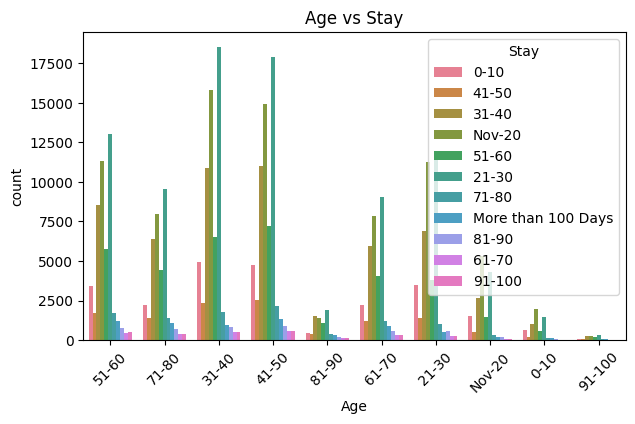

In [107]:
for i in range (len(cat_col)):
    for j in range (i+1, len(cat_col)):
         plt.figure(figsize=(7,4))
         sns.countplot(x=cat_col[i],hue=cat_col[j],data = df)
         plt.title (f"{cat_col[i]} vs {cat_col[j]}")
         plt.xticks(rotation=45)
         plt.show()

Observation - ->gynecology has the most observations with highest number of records for 21-30 Days Stay. ->ward type R and Q recorded the most number of patients for 21-30 Days and 11-20 Days. ->ward Facility code ward F and E has the most number of patients for 11-60 days. ->patients aged between 31-50 recorded most number of stays between 11-30 days. -> patients suffering Trauma recorded the highest with 11-30 days. -> patients with moderate and minor severity of illness recorded with highest number of days between 11-30 days. -> bed grade 2.0 and 3.0 were mostly used for each category of length of stay. -> Hospital region code X and Y are in for every category of length of stay. -> Hospital type code a, b and c are in for every category of length of stay.

In [198]:
df['Stay'].value_counts()

,count
Stay,
21-30,87491
Nov-20,78139
31-40,55159
51-60,35018
0-10,23604
41-50,11743
71-80,10254
More than 100 Days,6683
81-90,4838


**Target column distribution check**

/tmp/ipython-input-2422016565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stay',data=df,palette='viridis')


<Axes: xlabel='Stay', ylabel='count'>

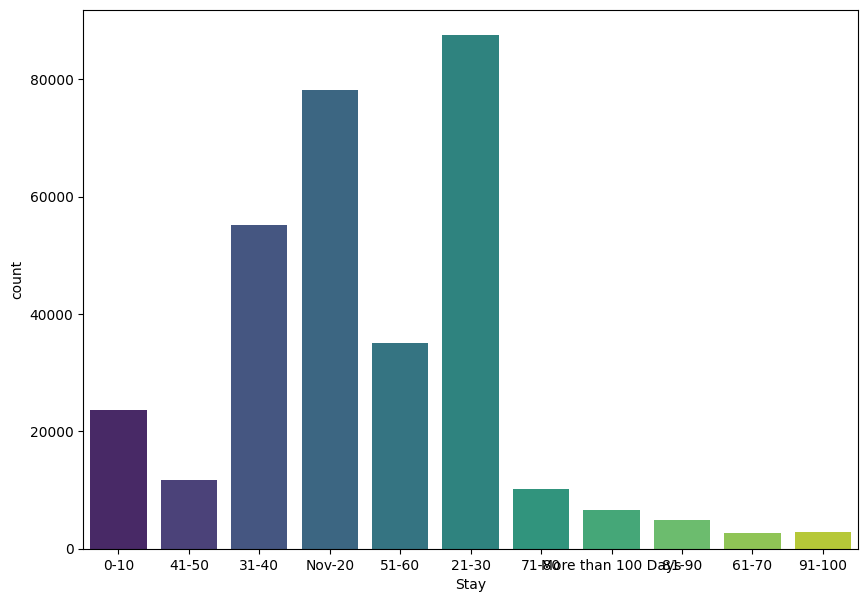

In [109]:
plt.figure(figsize=(10,7))
sns.countplot(x='Stay',data=df,palette='viridis')

In [199]:
df['Stay'].replace({'More than 100 Days':'>100','Nov-20':'11-20'}, inplace=True)


/tmp/ipython-input-1543597215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stay'].replace({'More than 100 Days':'>100','Nov-20':'11-20'}, inplace=True)


In [200]:
df['Stay'].value_counts()


,count
Stay,
21-30,87491
11-20,78139
31-40,55159
51-60,35018
0-10,23604
41-50,11743
71-80,10254
>100,6683
81-90,4838


Dividing the Labels
Here, I divide the stay duration into 3 categories 0: 0-20 days 1: 21-60 days 2: 61-100+ days

You might say why a disproportionate distribution. This is to balance the number of patients in each category

Plus the model will not give good prediction accuracy if there are 11 classes to predict. It would have given good results if there were a proportionate number of rows gives

In [201]:
df['Stay']= df['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'>100':2})

/tmp/ipython-input-614047068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stay']= df['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'>100':2})


In [202]:
df['Stay'].value_counts() # 0: 0-20 days 1: 21-60 days 2: 61-100+ days


,count
Stay,
1,154393
0,101743
2,62302


**Multivariate Analysis**

**Correlation Heatmap **

<Axes: >

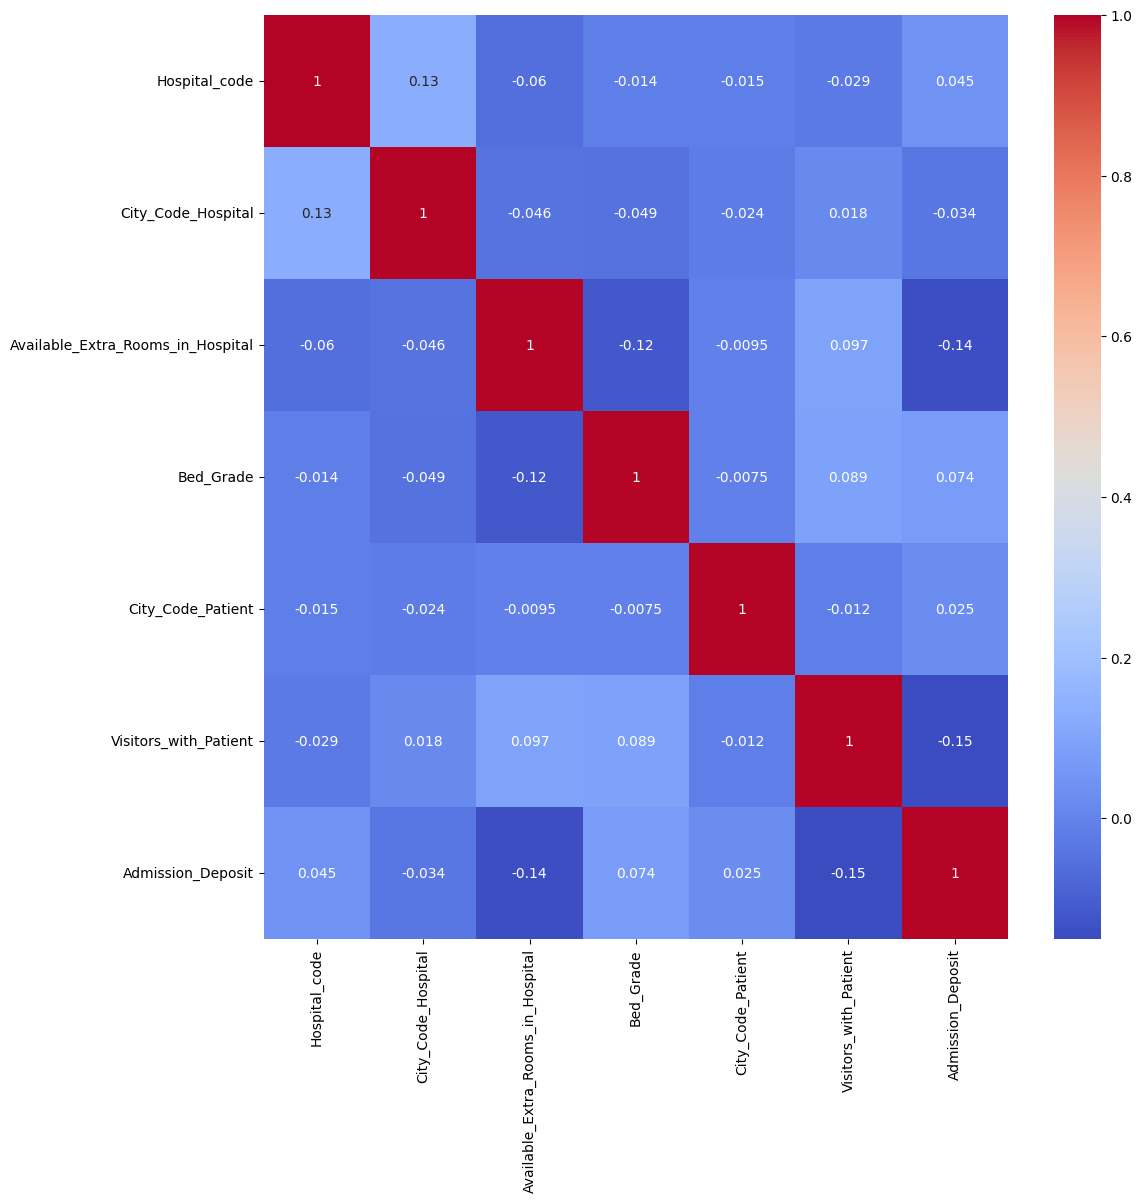

In [204]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')

The correlation heatmap shows no strong linear relationships among varaiables, indicating that patient stay depends on complex,nonlinear interactions rather tha individual features.

Checking for Outliers in numerical column

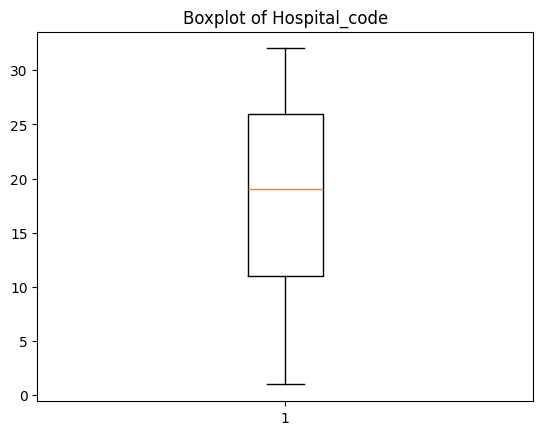

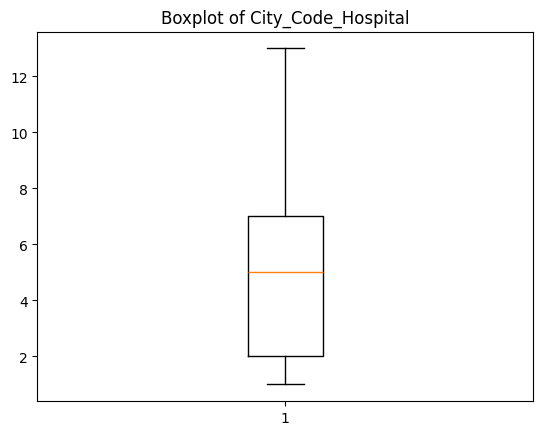

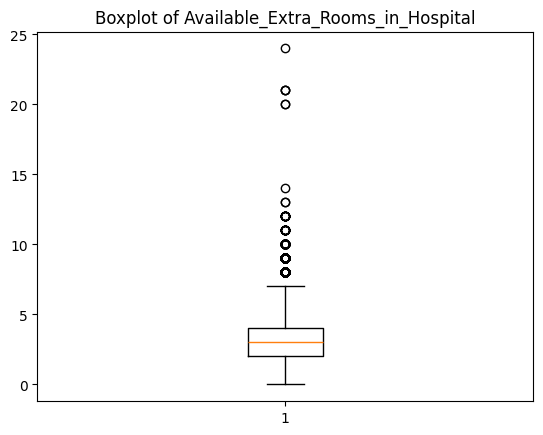

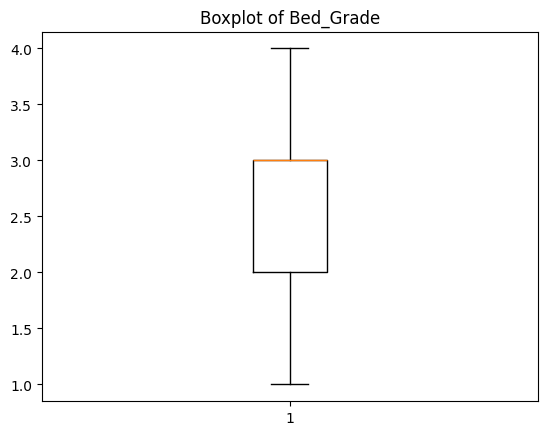

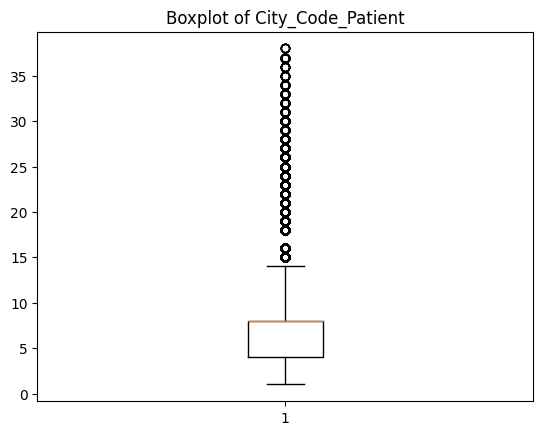

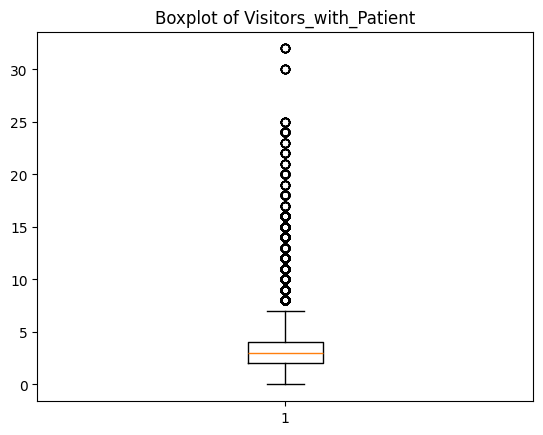

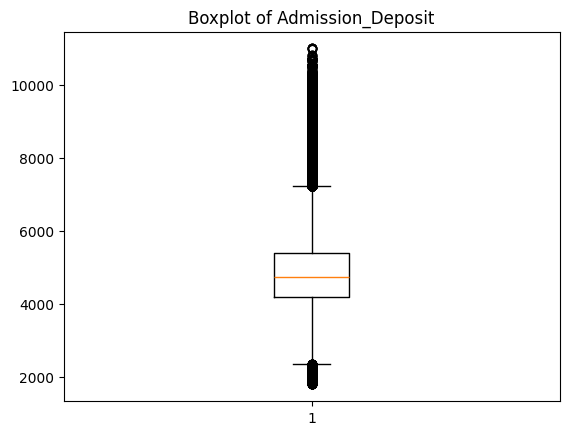

In [143]:
for col in num_col:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

**Handling Outliers** **IQR Method**

In [205]:
num_col

Index(['Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'City_Code_Patient',
       'Visitors_with_Patient', 'Admission_Deposit'],
      dtype='object')

In [207]:
num_col = ['Available_Extra_Rooms_in_Hospital','City_Code_Patient','Visitors_with_Patient', 'Admission_Deposit'] # only this column has outliers

In [208]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3 +1.5*IQR

df[num_col]= df[num_col].clip(lower,upper,axis =1)

Again checking For Outliers after doing the IQR Method

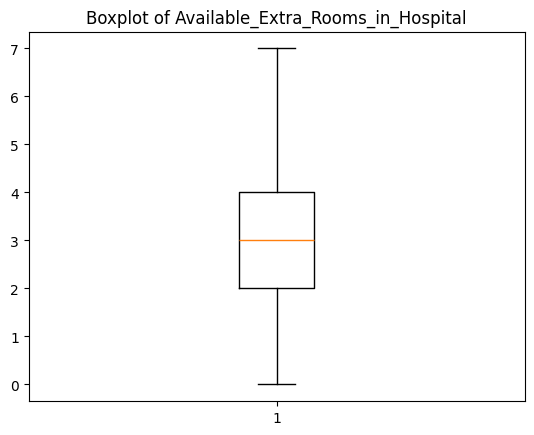

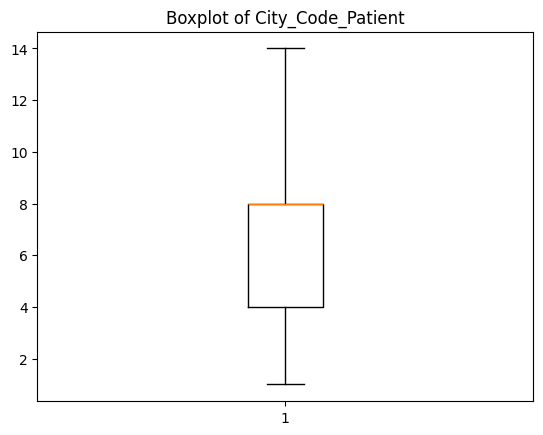

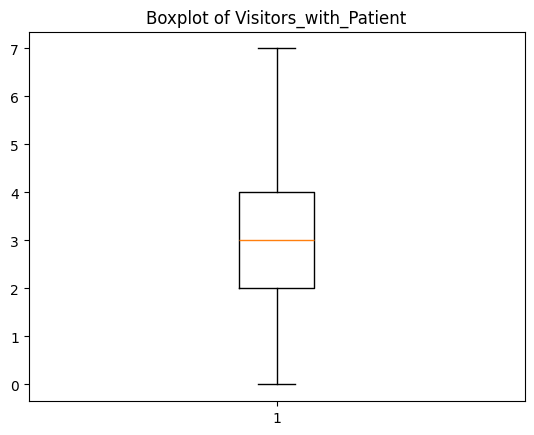

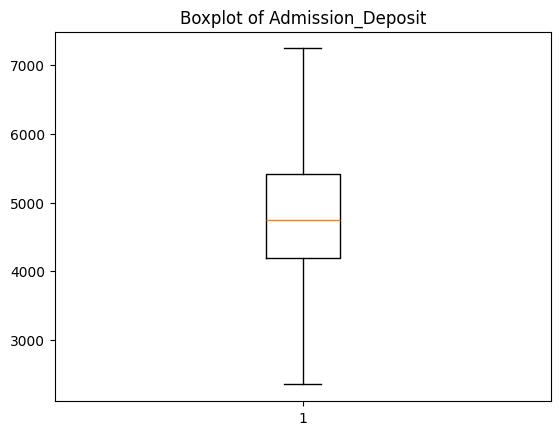

In [209]:
for col in num_col:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

No Outliers present now in numerical columns


Listing all categorical columns unique values

In [210]:
for col in cat_col:
   print(f"columns:{col}")
   print(df[col].unique())
   print("-"*40)

columns:Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']
----------------------------------------
columns:Hospital_region_code
['Z' 'X' 'Y']
----------------------------------------
columns:Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
----------------------------------------
columns:Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']
----------------------------------------
columns:Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']
----------------------------------------
columns:Type_of_Admission
['Emergency' 'Trauma' 'Urgent']
----------------------------------------
columns:Severity_of_Illness
['Extreme' 'Moderate' 'Minor']
----------------------------------------
columns:Age
['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' 'Nov-20' '0-10'
 '91-100']
----------------------------------------
columns:Stay
[0 1 2]
----------------------------------------


Based on the above observation Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code this columns has no order values so we need to do one-Hot encoding

**Ordinal Encoding using Mapping**

In [211]:
admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


df['Type_of_Admission']  =  df['Type_of_Admission'].map (admission_encode)
df['Severity_of_Illness']  =  df['Severity_of_Illness'].map (severity_encode)

In [212]:
df['Age'].value_counts()

,count
Age,
41-50,63749
31-40,63639
51-60,48514
21-30,40843
71-80,35792
61-70,33687
Nov-20,16768
81-90,7890
0-10,6254


In [213]:
df['Age']= df['Age'].replace("Nov-20",'11-20')

In [214]:
print(df['Age'].value_counts(ascending=False))

Age
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: count, dtype: int64


In [215]:
age_mapping = {
    '0-10':1,
    '11-20':2,
    '21-30':3,
    '31-40':4,
    '41-50':5,
    '51-60':6,
    '61-70':7,
    '71-80':8,
    '81-90':9,
    '91-100':10

}

In [216]:
df['Age']= df['Age'].map(age_mapping)

In [217]:
df['Age'].value_counts()

,count
Age,
5,63749
4,63639
6,48514
3,40843
8,35792
7,33687
2,16768
9,7890
1,6254


In [218]:
cat_col = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code']

**Encoding**

In [219]:
df = pd.get_dummies(df,columns=cat_col,drop_first=True)


In [162]:
num_col

['Available_Extra_Rooms_in_Hospital',
 'City_Code_Patient',
 'Visitors_with_Patient',
 'Admission_Deposit']

In [220]:
df.head()

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,8,3,3,2.0,7.0,3,3,2,6,4911.0,...,False,True,False,False,False,False,False,False,False,True
1,2,5,2,2.0,7.0,1,3,2,6,5954.0,...,False,False,True,False,False,False,False,False,False,True
2,10,1,2,2.0,7.0,1,3,2,6,4745.0,...,False,False,True,False,False,False,False,False,True,False
3,26,2,2,2.0,7.0,1,3,2,6,7243.5,...,False,True,False,False,False,False,False,True,False,False
4,26,2,2,2.0,7.0,1,3,2,6,5558.0,...,False,False,True,False,False,False,False,True,False,False


In [221]:
df.replace({True:1,False:0},inplace=True)

/tmp/ipython-input-2938164920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [222]:
df.head()

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,8,3,3,2.0,7.0,3,3,2,6,4911.0,...,0,1,0,0,0,0,0,0,0,1
1,2,5,2,2.0,7.0,1,3,2,6,5954.0,...,0,0,1,0,0,0,0,0,0,1
2,10,1,2,2.0,7.0,1,3,2,6,4745.0,...,0,0,1,0,0,0,0,0,1,0
3,26,2,2,2.0,7.0,1,3,2,6,7243.5,...,0,1,0,0,0,0,0,1,0,0
4,26,2,2,2.0,7.0,1,3,2,6,5558.0,...,0,0,1,0,0,0,0,1,0,0


**Scaling**

In [223]:
from sklearn.preprocessing import StandardScaler  # scaling numerical columns

ss= StandardScaler()

df[num_col]= ss.fit_transform(df[num_col].values)

In [224]:
df

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,8,3,-0.167756,2.0,0.043132,3,3,-0.861741,6,0.058583,...,0,1,0,0,0,0,0,0,0,1
1,2,5,-1.043045,2.0,0.043132,1,3,-0.861741,6,1.101176,...,0,0,1,0,0,0,0,0,0,1
2,10,1,-1.043045,2.0,0.043132,1,3,-0.861741,6,-0.107352,...,0,0,1,0,0,0,0,0,1,0
3,26,2,-1.043045,2.0,0.043132,1,3,-0.861741,6,2.390173,...,0,1,0,0,0,0,0,1,0,0
4,26,2,-1.043045,2.0,0.043132,1,3,-0.861741,6,0.705331,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,6,-0.167756,4.0,2.014242,3,2,-0.141532,5,-0.708118,...,1,0,0,0,0,0,0,0,0,1
318434,24,1,-1.043045,4.0,0.324719,2,2,0.578677,9,1.845886,...,1,0,0,0,0,0,0,0,1,0
318435,7,4,-0.167756,4.0,0.887894,3,1,-0.141532,8,-0.617153,...,0,1,0,0,0,0,0,0,0,1
318436,11,2,-0.167756,3.0,0.324719,1,1,1.298886,2,-1.090968,...,1,0,0,0,0,0,0,1,0,0


**Split into the data to Train and test**

In [225]:
from sklearn.model_selection import train_test_split

y= df['Stay']
X= df.drop('Stay', axis=1)

In [226]:
X

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,8,3,-0.167756,2.0,0.043132,3,3,-0.861741,6,0.058583,...,0,1,0,0,0,0,0,0,0,1
1,2,5,-1.043045,2.0,0.043132,1,3,-0.861741,6,1.101176,...,0,0,1,0,0,0,0,0,0,1
2,10,1,-1.043045,2.0,0.043132,1,3,-0.861741,6,-0.107352,...,0,0,1,0,0,0,0,0,1,0
3,26,2,-1.043045,2.0,0.043132,1,3,-0.861741,6,2.390173,...,0,1,0,0,0,0,0,1,0,0
4,26,2,-1.043045,2.0,0.043132,1,3,-0.861741,6,0.705331,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,6,-0.167756,4.0,2.014242,3,2,-0.141532,5,-0.708118,...,1,0,0,0,0,0,0,0,0,1
318434,24,1,-1.043045,4.0,0.324719,2,2,0.578677,9,1.845886,...,1,0,0,0,0,0,0,0,1,0
318435,7,4,-0.167756,4.0,0.887894,3,1,-0.141532,8,-0.617153,...,0,1,0,0,0,0,0,0,0,1
318436,11,2,-0.167756,3.0,0.324719,1,1,1.298886,2,-1.090968,...,1,0,0,0,0,0,0,1,0,0


In [171]:
y

,Stay
0,0
1,1
2,1
3,1
4,1
...,...
318433,0
318434,1
318435,0
318436,0


In [228]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [178]:
value= [LogisticRegression(class_weight='balanced'), RandomForestClassifier(class_weight='balanced'), DecisionTreeClassifier(class_weight='balanced'),  KNeighborsClassifier(), XGBClassifier(class_weight='balanced')]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
0.56555395050873
RandomForsetClassifier
0.5978520286396182
DecisionTreeClassifier
0.5190930787589498
KNeighborsClassifier
0.5582684336138676


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:27:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier
0.6296319557844492


<Axes: >

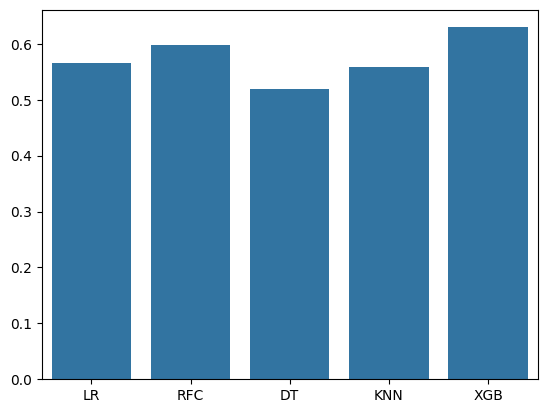

In [229]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

It is clear that XGBClassifier are best for the data.

but,for now I decided to go with only tuning XGBClassifier model

Hyper parameter tuning only for XGBClassifier Randomized search cv

In [180]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.0;, score=0.626 total time=  36.7s
[CV 2/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.0;, score=0.618 total time=  37.3s
[CV 3/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.0;, score=0.607 total time=  37.5s
[CV 1/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=12, objective=binary:logistic, subsample=0.8;, score=0.630 total time=  40.2s
[CV 2/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=12, objective=binary:logistic, subsample=0.8;, score=0.623 total time=  40.3s
[CV 3/3] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=12, objective=binary:logistic, subsample=0.8;, score=0.611 total time=  40.6s
[CV 1/3] END colsample_bytree=0

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=3)

In [181]:
grid.best_score_

np.float64(0.62477782174238)

In [182]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

In [183]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6427741489762593
[[10095  9635   619]
 [ 5571 22381  2927]
 [  638  3361  8461]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55     20349
           1       0.63      0.72      0.68     30879
           2       0.70      0.68      0.69     12460

    accuracy                           0.64     63688
   macro avg       0.65      0.63      0.64     63688
weighted avg       0.64      0.64      0.64     63688



class 0 > (majority)  recall is hughest

class 1 >(medium class) recall lowest

class 2 > (minority) balanced

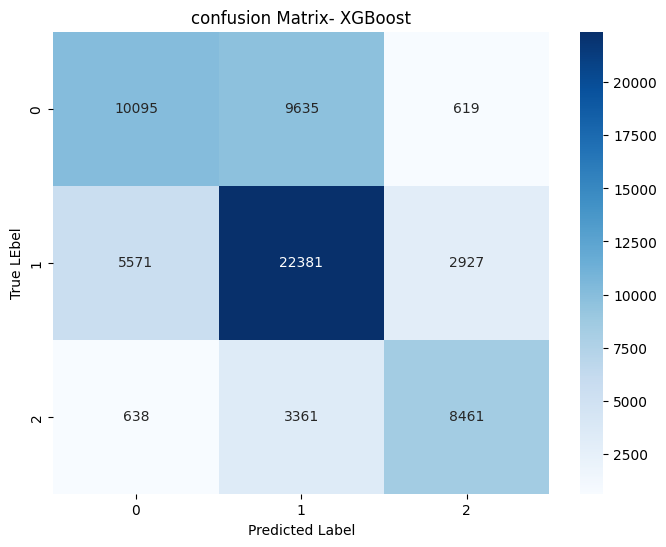

In [184]:
#create Confusion matrix
cm= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel('True LEbel')
plt.title('confusion Matrix- XGBoost')
plt.show()

Correctly oredicted
class 0 10095
class 1 22381
class 2 8461

misclasification
class 0 predicted as class 1 9635
class 1 predicted as class 0 5571
class 2 predicted as class 1 3361



**chalenges faced:**

**Challenge:** Some LOS categories had significantly fewer samples.
**Solution:**
Used class_weight='balanced' to ensure fair learning across all classes.

**Challenge:** Columns like:
Available_Extra_Rooms_in_Hospital
Visitors_with_Patient
Admission_Deposit - contained outliers.
**Solution:**
Outliers were analyzed visually and models like Random Forest and XGBoost, which are less sensitive to outliers, were preferred.

Scaling
**Challenge:** Models like KNN are sensitive to feature magnitude.
**Solution:**
Applied StandardScaler to normalize numerical features.

High Dimensionality
Challenge: Large number of features increased model complexity.
Solution:
Ensemble models (Random Forest, XGBoost) were used since they naturally handle feature importance and interactions.

**Conclusion:**

This project successfully demonstrates the application of machine learning techniques to predict hospital patient length of stay. After evaluating multiple models, **XGBoost** Achieved the highest accuracy and best overall performance, especially in terms of precision and recall across multiple classes.. The insights gained from this model can help hospitals improve operational efficiency, reduce overcrowding, and enhance patient care.